## Importando Utilitários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from PrettyPrint import PrettyPrintTree
from morpho_package import *

array([[7, 5, 6, 5, 5],
       [5, 6, 6, 7, 6],
       [6, 7, 6, 7, 5],
       [5, 5, 6, 7, 5],
       [7, 6, 7, 7, 7]])

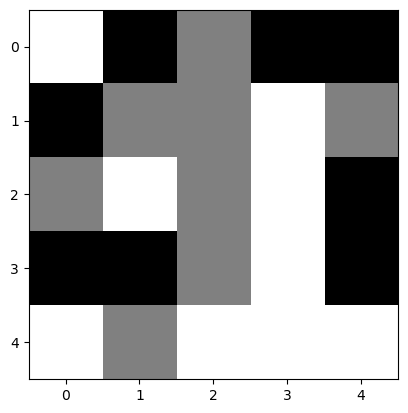

In [2]:
np.random.seed(3)
img = np.random.randint(5, 8, (5, 5))
plt.imshow(img, 'gray', )
img

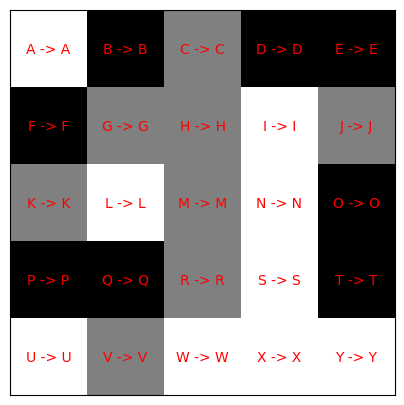

In [3]:
upper_level_sets = UpperLevelSets(img, Adjacency8())
upper_level_sets.showParents()
# teste.sorted_pixels = np.array([
#         13,  8,  4, 20, 16,
#         21, 14,  7,  0, 23,
#         19, 15, 12,  2, 24,
#          6,  1, 22, 18, 17,
#         11,  5, 10,  9,  3
# ]) # Esse vetor de pixels ordenados é usado apenas para comparação com o resultado da lib skimage

### Computar árvore de componentes

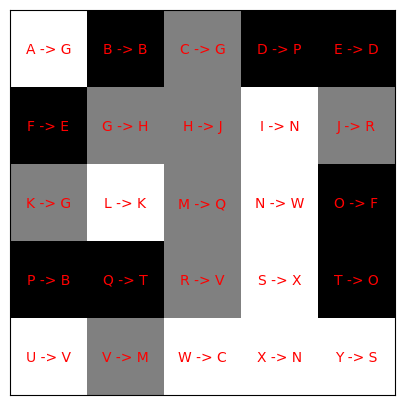

In [4]:
upper_level_sets.computeTree()
upper_level_sets.showParents()

### Max-tree (Canonizar pixels)

1
12
20
22
0
11


'Pixels Canônicos: [1, 12, 20, 22, 0, 11]'

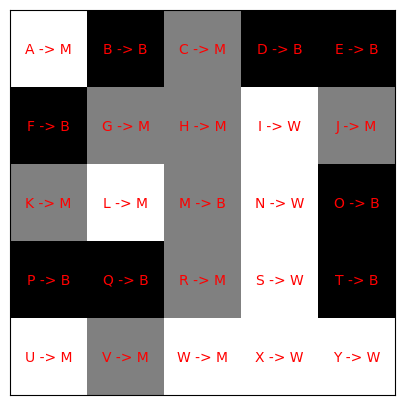

In [5]:
max_tree = MaxTree(img, Adjacency8())
max_tree.showParents()
f'Pixels Canônicos: {max_tree.canonical_pixels}'

24
10
16
19
5
4


'Pixels Canônicos: [24, 10, 16, 19, 5, 4]'

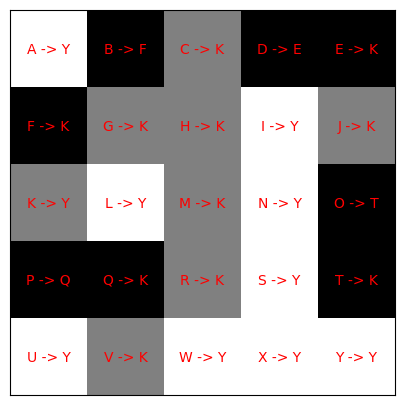

In [6]:
min_tree = MinTree(img, Adjacency8())
min_tree.showParents()
f'Pixels Canônicos: {min_tree.canonical_pixels}'

In [7]:
# # Apenas para comparação
# from skimage.morphology import max_tree
# P, S = max_tree(img, connectivity=8)
# showParents(img, S, P)
# P, S

In [8]:
nodes = {}

for c_index in max_tree.canonical_pixels:
    if c_index not in nodes.keys():
        c_point = max_tree.pixel_indexer.index_to_coord(c_index)
        level = max_tree.image[c_point.row, c_point.col]

        if max_tree.parent[c_index] == c_index:
            nodes[c_index] = Node(level, c_index)

        else:
            c_parent = max_tree.parent[c_index]
            nodes[c_index] = Node(level, c_index, nodes[c_parent])
            nodes[c_parent].addChildren(nodes[c_index])

In [9]:
pt = PrettyPrintTree(lambda x: x.childrens.values(), lambda x: x.getInfo())
pt(nodes[1])

                               Representant: 1      
                               Parent: 1            
                               CNPs: []             
                               Children Nodes: [12] 
                                        |
                         Representant: 12                
                         Parent: 1                       
                         CNPs: []                        
                         Children Nodes: [20, 22, 0, 11] 
         ┌────────────────────┬─────────┴──────────┬────────────────────┐
 Representant: 20     Representant: 22     Representant: 0      Representant: 11   
 Parent: 12           Parent: 12           Parent: 12           Parent: 12         
 CNPs: []             CNPs: []             CNPs: []             CNPs: []           
 Children Nodes: []   Children Nodes: []   Children Nodes: []   Children Nodes: [] 


In [10]:
up = UpperLevelSets(img)
low = LowerLevelSets(img)

up.sorted_pixels, low.sorted_pixels

(array([24, 18,  8, 11, 23, 13,  0, 22, 20, 10,  2,  6,  7,  9, 17, 21, 12,
        16, 19, 14,  5,  4,  3, 15,  1]),
 array([ 1, 15,  3,  4,  5, 14, 19, 16, 12, 21, 17,  9,  7,  6,  2, 10, 20,
        22,  0, 13, 23, 11,  8, 18, 24]))

In [11]:
np.flip(up.sorted_pixels) == low.sorted_pixels


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

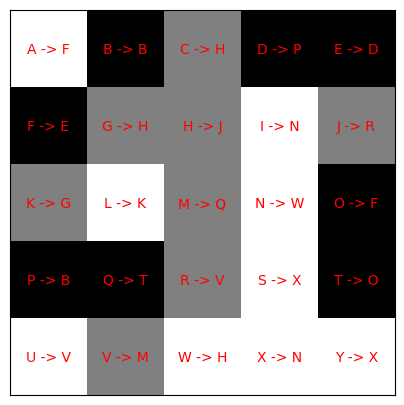

In [12]:
up.computeTree()
up.showParents()